<a href="https://colab.research.google.com/github/kazimovmirkazim/Computer-Vision/blob/main/Dog_breeds_image_analysis_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kazmovmirkazm","key":"ead63af5676bff3900af9eb83e241066"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download darshanthakare/dog-breeds-image-dataset

Dataset URL: https://www.kaggle.com/datasets/darshanthakare/dog-breeds-image-dataset
License(s): MIT
 99% 743M/753M [00:02<00:00, 261MB/s]
100% 753M/753M [00:02<00:00, 357MB/s]


In [4]:
import zipfile

In [5]:
with zipfile.ZipFile('/content/dog-breeds-image-dataset.zip', 'r') as zip_ref:
  zip_ref.extractall()

import tensorflow as tf


In [31]:
import os
import tensorflow as tf

data_path = '/content/Dog Breeds Image Dataset'
img_size=(224,224)

# List of invalid image files to exclude
invalid_images = [
    '/content/Dog Breeds Image Dataset/germanshepherd/germanshepherd_7.jpg',
    '/content/Dog Breeds Image Dataset/mix/mix_72.jpg'
]

def is_valid_image(filepath):
    """Checks if the image file is valid (JPEG, PNG, GIF, or BMP)."""
    try:
        with tf.io.gfile.GFile(filepath, 'rb') as f:
            header = f.read(4)
            return (header.startswith(b'\xff\xd8') or  # JPEG
                    header.startswith(b'\x89PNG') or   # PNG
                    header.startswith(b'GIF8') or    # GIF
                    header.startswith(b'BM'))       # BMP
    except Exception:
        return False

def one_hot_encode(image, label):
    return image, tf.one_hot(label, len(class_names))

# Create datasets and filter out invalid images
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    subset='training',
    validation_split=0.2,
    seed=42,
    image_size=img_size,
    label_mode='int'
)
class_names = train_ds.class_names

# Filter invalid images from the dataset
train_data = train_ds.filter(lambda x, y: tf.py_function(is_valid_image, [x], tf.bool)).map(one_hot_encode)


valid_data= tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    subset='validation',
    validation_split=0.2,
    image_size=img_size,
    seed=42,
    label_mode='int',
).filter(lambda x, y: tf.py_function(is_valid_image, [x], tf.bool)).map(one_hot_encode) # Then map to one-hot encode

Found 17498 files belonging to 157 classes.
Using 13999 files for training.
Found 17498 files belonging to 157 classes.
Using 3499 files for validation.


In [23]:
for image,label in train_ds.take(1):
  print(label.numpy())

[ 52  37  27  60 125 111 142 134  60  26  10   0  55  12 156 119  85  37
 118  80 128 155 153  80  96  20  48  92  37  82 146   2]


In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

In [32]:
class_names= train_ds.class_names
class_names

['affenpinscher',
 'afghan_hound',
 'african',
 'airedale',
 'akita',
 'american_terrier',
 'appenzeller',
 'australian_cattledog',
 'australian_terrier',
 'basenji',
 'basset_hound',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain',
 'bichon_frise',
 'blenheim_spaniel',
 'blood_hound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bulldog',
 'bouvier',
 'boxer',
 'brabancon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn_terrier',
 'cardigan_corgi',
 'caucasian_ovcharka',
 'cavapoo',
 'chesapeake_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cockapoo',
 'cocker_spaniel',
 'coonhound',
 'cotondetulear',
 'curly_retriever',
 'dachshund',
 'dalmatian',
 'dandie_terrier',
 'dhole',
 'dingo',
 'doberman',
 'english_bulldog',
 'english_hound',
 'english_mastiff',
 'english_setter',
 'english_sheepdog',
 'english_springer',
 'entlebucher',
 'eskimo',
 'flatcoated_retriever',
 'fox_terrier',
 'french_bulldog',
 'german_pointer',
 'germanlonghair_poin

In [25]:
#one hot encoder categorical
# label encoder sparse categorical

len(class_names)

157

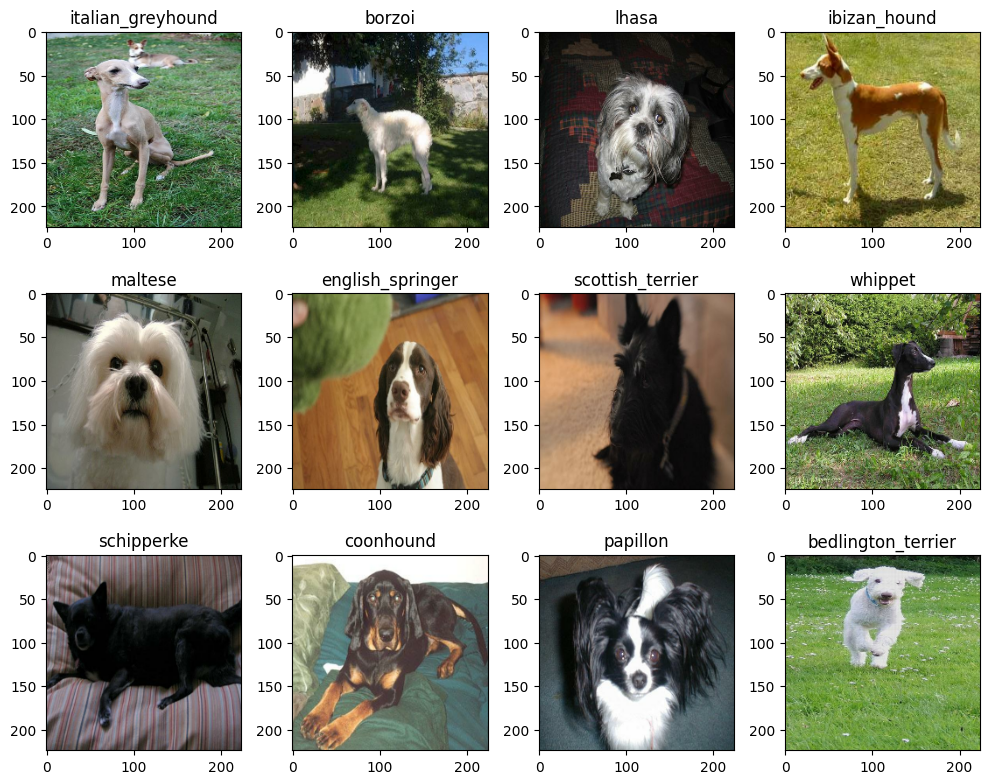

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
for image,label in train_data.take(1):
  for i in range(12):
    plt.subplot(3,4,i+1)
    # Convert the image tensor to a NumPy array and then to uint8 for plotting
    plt.imshow(image[i].numpy().astype('uint8'))
    # Use argmax on the label tensor to get the index of the predicted class
    plt.title(class_names[label[i].numpy().argmax()])
plt.tight_layout()
plt.show()

In [37]:
import os

# List of invalid image files to remove
invalid_images = [
    '/content/Dog Breeds Image Dataset/germanshepherd/germanshepherd_7.jpg',
    '/content/Dog Breeds Image Dataset/mix/mix_72.jpg'
]

# Remove invalid image files
for invalid_file in invalid_images:
    if os.path.exists(invalid_file):
        try:
            os.remove(invalid_file)
            print(f"Removed invalid file: {invalid_file}")
        except Exception as e:
            print(f"Error removing file {invalid_file}: {e}")
    else:
        print(f"Invalid file not found: {invalid_file}")

# Now, recreate the datasets after removing the invalid files
data_path = '/content/Dog Breeds Image Dataset'
img_size=(224,224)

def one_hot_encode(image, label):
    return image, tf.one_hot(label, len(class_names))

# Create datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    subset='training',
    validation_split=0.2,
    seed=42,
    image_size=img_size,
    label_mode='int'
)
class_names = train_ds.class_names

train_data = train_ds.map(one_hot_encode)


valid_data= tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    subset='validation',
    validation_split=0.2,
    image_size=img_size,
    seed=42,
    label_mode='int',
).map(one_hot_encode) # Then map to one-hot encode

print("\nDatasets recreated after removing invalid files.")

Removed invalid file: /content/Dog Breeds Image Dataset/germanshepherd/germanshepherd_7.jpg
Removed invalid file: /content/Dog Breeds Image Dataset/mix/mix_72.jpg
Found 17496 files belonging to 157 classes.
Using 13997 files for training.
Found 17496 files belonging to 157 classes.
Using 3499 files for validation.

Datasets recreated after removing invalid files.


In [39]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy','f1_score'])

history = model_1.fit(
    train_data,
    epochs=5,
    validation_data=valid_data,
)

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 60s 124ms/step - accuracy: 0.9529 - f1_score: 0.8219 - loss: 0.3641 - val_accuracy: 0.0397 - val_f1_score: 0.0216 - val_loss: 6.4288
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 50s 115ms/step - accuracy: 0.9745 - f1_score: 0.8888 - loss: 0.1731 - val_accuracy: 0.0363 - val_f1_score: 0.0226 - val_loss: 7.6005
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 50s 114ms/step - accuracy: 0.9728 - f1_score: 0.8966 - loss: 0.1786 - val_accuracy: 0.0434 - val_f1_score: 0.0303 - val_loss: 7.5489
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 83s 116ms/step - accuracy: 0.9872 - f1_score: 0.9085 - loss: 0.1085 - val_accuracy: 0.0414 - val_f1_score: 0.0292 - val_loss: 7.8604
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 81s 113ms/step - accuracy: 0.9915 - f1_score: 0.9118 - loss: 0.0759 - val_accuracy: 0.0394 - val_f1_score: 0.0253 - val_loss: 9.0478


In [ ]:
# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

# Apply data augmentation to the training data
train_data_augmented = train_data.map(lambda x, y: (data_augmentation(x, training=True), y))

history_augmented = model_1.fit(
    train_data_augmented,
    epochs=5, # You might need more epochs with augmentation
    validation_data=valid_data,
)

base_model = tf.keras.applications.MobileNetV2(input_shape=(img_size[0], img_size[1], 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False # Freeze the base model

# # Add a new classifier on top
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(len(class_names), activation='softmax')

model_transfer = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

# # Compile and train the transfer learning model
base_learning_rate = 0.0001
model_transfer.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history_transfer = model_transfer.fit(train_data_augmented,
                                      epochs=10,
                                      validation_data=valid_data)

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 222s 505ms/step - accuracy: 0.0341 - f1_score: 0.0223 - loss: 5.8394 - val_accuracy: 0.0443 - val_f1_score: 0.0203 - val_loss: 4.5602
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 223s 509ms/step - accuracy: 0.0462 - f1_score: 0.0263 - loss: 4.4273 - val_accuracy: 0.0460 - val_f1_score: 0.0208 - val_loss: 4.5976
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 222s 506ms/step - accuracy: 0.0560 - f1_score: 0.0331 - loss: 4.3242 - val_accuracy: 0.0549 - val_f1_score: 0.0268 - val_loss: 4.3898
Epoch 4/5
292/438 ━━━━━━━━━━━━━━━━━━━━ 1:11 492ms/step - accuracy: 0.0683 - f1_score: 0.0385 - loss: 4.2607

In [30]:
import os

def find_invalid_images(data_path):
    invalid_files = []
    for subdir, _, files in os.walk(data_path):
        for file in files:
            filepath = os.path.join(subdir, file)
            try:
                with tf.io.gfile.GFile(filepath, 'rb') as f:
                    # Check for common image file headers
                    header = f.read(4)
                    if not (header.startswith(b'\xff\xd8') or  # JPEG
                            header.startswith(b'\x89PNG') or   # PNG
                            header.startswith(b'GIF8') or    # GIF
                            header.startswith(b'BM')):       # BMP
                        invalid_files.append(filepath)
            except Exception as e:
                invalid_files.append(filepath)
                print(f"Error processing file {filepath}: {e}")
    return invalid_files

# Find invalid images in the dataset
invalid_images = find_invalid_images(data_path)

# Print the list of invalid files
if invalid_images:
    print("Found invalid image files:")
    for invalid_file in invalid_images:
        print(invalid_file)
else:
    print("No invalid image files found.")

# You may want to remove or quarantine these files before proceeding with training.
# For example, to remove them:
# for invalid_file in invalid_images:
#     os.remove(invalid_file)

Found invalid image files:
/content/Dog Breeds Image Dataset/germanshepherd/germanshepherd_7.jpg
/content/Dog Breeds Image Dataset/mix/mix_72.jpg
